In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb


In [49]:
#Import csv

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
#Looking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
# Name, ticket and Passenger id are basically useless 
# ( we _could_ infere something from the titles included in names, 
# but it's a story for another day)
# Cabin column (majority of null values) will be dropped, 
# as will be the 2 rows with missing embarked,
# but Age should be imputed (filling with mean?)

df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(['Cabin', 'Name', 'PassengerId','Ticket'], axis=1)
df = df.dropna(axis=0)

In [53]:
df.isna().sum()
#Well done guys / Bravo à tous

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [54]:
# beside fare and age, all others variables are categorical and should be encoded
df= pd.get_dummies(data=df, columns=['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked'] )
df.describe()
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [55]:
# scaling data
colonnes = df.columns
scaler = MinMaxScaler()
df[colonnes] = scaler.fit_transform(df)
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.472229,0.139136,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.015713,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.334004,0.025374,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,0.367921,0.045771,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1.0,0.321438,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [56]:
# train _ test splitting
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'])

In [57]:
# Code Factorisation
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'])

dico_model = { 
    GradientBoostingClassifier : {'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 8]},
    lgb.LGBMClassifier : {'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 8]},
    xgb.XGBClassifier : { 'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 8]},
    LogisticRegression : {'max_iter' : [50, 100 , 200 , 500],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
    SVC : {'kernel' : ['linear', 'poly','rbf', 'sigmoid']},
    Perceptron : {'max_iter' : [100, 200, 500, 1000],
    'eta0' : [0.5, 1, 1.5]}
}

def model_comp(x_train, x_test, y_train, y_test, modeldictionnary):
    
    #preformatting outputs
    output = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    estimators= dict()
    #Extracting model
    for i, (model, param) in enumerate(modeldictionnary.items()):
        #declaring model 
        mod = model()

        #grid
        grid = GridSearchCV(mod, param, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
        grid.fit(x_train, y_train)

        #Extracting Best Parameters
        best_params = grid.best_params_
        #fitting model with best parameters
        best_mod = model(**best_params)
        best_mod.fit(x_train, y_train)
        y_hat= best_mod.predict(x_test)
        #computing metrics
        accuracy = accuracy_score(y_test, y_hat)
        precision = precision_score(y_test, y_hat)
        recall = recall_score(y_test, y_hat)
        f1= f1_score(y_test, y_hat)
        metrics = [accuracy, precision, recall, f1]
        #output format
        output.loc[mod.__class__.__name__] = metrics
        #saving best estimators in a dict
        estimators[mod.__class__.__name__] = best_mod

    return output.style.highlight_max(color='darkgrey'), estimators
        
sortie_df, best_estimators = model_comp(x_train,x_test, y_train, y_test, dico_model)
sortie_df

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,Accuracy,Precision,Recall,F1 Score
GradientBoostingClassifier,0.807175,0.883333,0.595506,0.711409
LGBMClassifier,0.807175,0.819444,0.662921,0.732919
XGBClassifier,0.825112,0.837838,0.696629,0.760736
LogisticRegression,0.825112,0.797619,0.752809,0.774566
SVC,0.784753,0.815385,0.595506,0.688312
Perceptron,0.789238,0.838710,0.584270,0.688742


Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Gradient boosting Classifier : accuracy_gb=0.820627802690583
best_params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


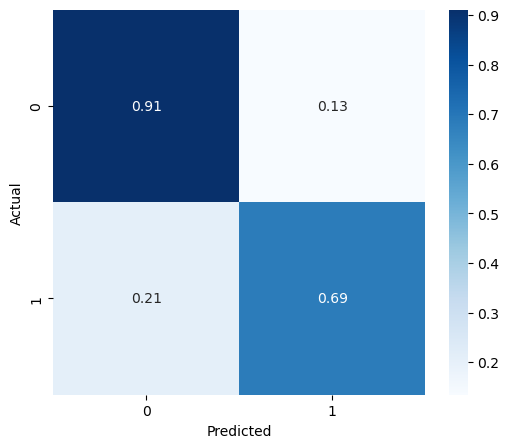

In [58]:
 #Define model
GBclass = GradientBoostingClassifier()

#hyperparameters grid 

param_grid = {
    'n_estimators': [ 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [ 3, 5, 8]
}

#define gridsearch, won't use refit here so we can study the best model as an object latter
#note : gaining ~3% accuracy with fold at 5 'stead of 3
grid = GridSearchCV(GBclass, param_grid, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
grid.fit(x_train, y_train)

#extracting best parameters
best_params = grid.best_params_

#predicting with best estimator
best_GB = GradientBoostingClassifier(**best_params)
best_GB.fit(x_train, y_train)
y_hat_gb= best_GB.predict(x_test)

#scoring
accuracy_gb = accuracy_score(y_test, y_hat_gb)
print(f' Gradient boosting Classifier : {accuracy_gb=}')

#confusion matrix (normalized)
conf_matrix_gb = confusion_matrix(y_test, y_hat_gb)
conf_matrix_gb = conf_matrix_gb/ conf_matrix_gb.sum(axis = 1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb, annot=True, cbar = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'{best_params=}')

In [59]:
#classification report 
report = classification_report(y_test, y_hat_gb, target_names=['Jacked', 'Rose_GG'])
print(report)
output_GB = precision_recall_fscore_support(y_test, y_hat_gb, average='macro')
output_GB


              precision    recall  f1-score   support

      Jacked       0.81      0.91      0.86       134
     Rose_GG       0.84      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



(0.8244748858447488, 0.797920509810498, 0.8061206746652757, None)

<BarContainer object of 24 artists>

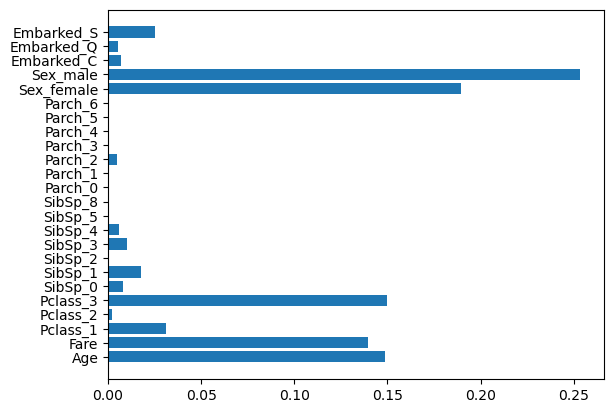

In [60]:
#Pareto diagram
features_imp = best_GB.feature_importances_
plt.barh(df.drop(['Survived'], axis=1).columns, features_imp)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
 LGBM Classifier : accuracy_lgb=0.8071748878923767
best_params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

      Jacked       0.80      0.90      0.85       134
     Rose_GG       0.82      0.66      0.73        89

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



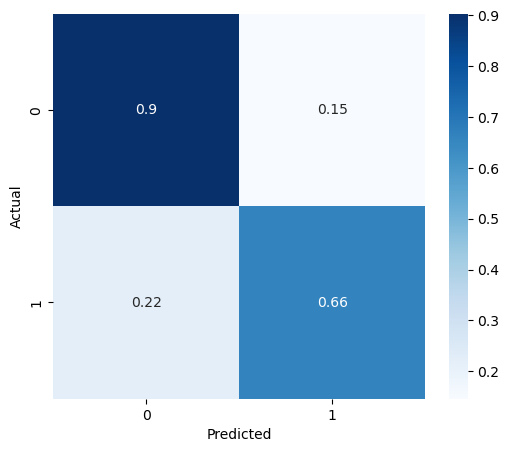

In [61]:
#Test with lightbgm


 #Define model
LGBclass = lgb.LGBMClassifier()

#hyperparameters grid 

param_grid = {
    'n_estimators': [ 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [ 3, 5, 8]
}

#define gridsearch, won't use refit here so we can study the best model as an object latter
#note : gaining ~3% accuracy with fold at 5 'stead of 3
grid = GridSearchCV(LGBclass, param_grid, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
grid.fit(x_train, y_train)

#extracting best parameters
best_params = grid.best_params_

#predicting with best estimator
best_LGB = lgb.LGBMClassifier(**best_params)
best_LGB.fit(x_train, y_train)
y_hat_lgb= best_LGB.predict(x_test)

#scoring
accuracy_lgb = accuracy_score(y_test, y_hat_lgb)
print(f' LGBM Classifier : {accuracy_lgb=}')

#confusion matrix (normalized)
conf_matrix_lgb = confusion_matrix(y_test, y_hat_lgb)
conf_matrix_lgb = conf_matrix_lgb/ conf_matrix_lgb.sum(axis = 1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgb, annot=True, cbar = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'{best_params=}')

#classification report 
report = classification_report(y_test, y_hat_lgb, target_names=['Jacked', 'Rose_GG'])
print(report)
output_LGBM = precision_recall_fscore_support(y_test, y_hat_lgb, average='macro')


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

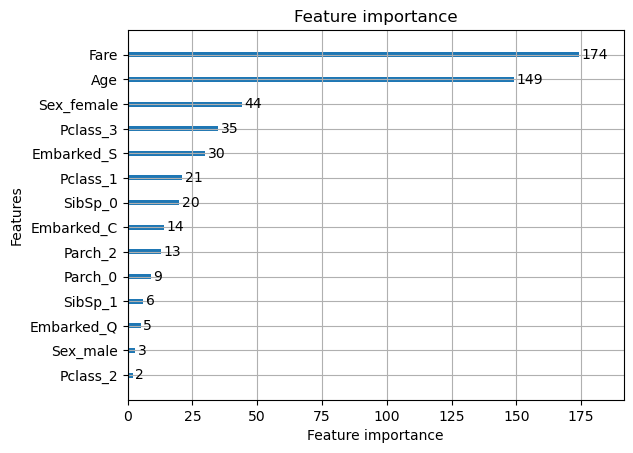

In [62]:
#importance diagram
lgb.plot_importance(best_LGB)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
 XG BOOST Classifier : accuracy_xg=0.8251121076233184
best_params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

      Jacked       0.82      0.91      0.86       134
     Rose_GG       0.84      0.70      0.76        89

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



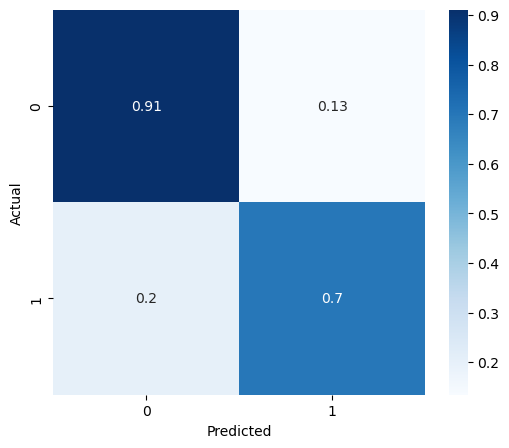

In [63]:
#comparing with xgboost


 #Define model
xgclass = xgb.XGBClassifier()

#hyperparameters grid 

param_grid = {
    'n_estimators': [ 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [ 3, 5, 8]
}

#define gridsearch, won't use refit here so we can study the best model as an object latter
grid = GridSearchCV(xgclass, param_grid, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
grid.fit(x_train, y_train)

#extracting best parameters
best_params = grid.best_params_

#predicting with best estimator
best_xg = xgb.XGBClassifier(**best_params)
best_xg.fit(x_train, y_train)
y_hat_xg= best_xg.predict(x_test)

#scoring
accuracy_xg = accuracy_score(y_test, y_hat_xg)
print(f' XG BOOST Classifier : {accuracy_xg=}')

#confusion matrix (normalized)
conf_matrix_xg = confusion_matrix(y_test, y_hat_xg)
conf_matrix_xg = conf_matrix_xg/ conf_matrix_xg.sum(axis = 1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xg, annot=True, cbar = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'{best_params=}')

#classification report 
report = classification_report(y_test, y_hat_xg, target_names=['Jacked', 'Rose_GG'])
print(report)
output_xg = precision_recall_fscore_support(y_test, y_hat_xg, average='macro')


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

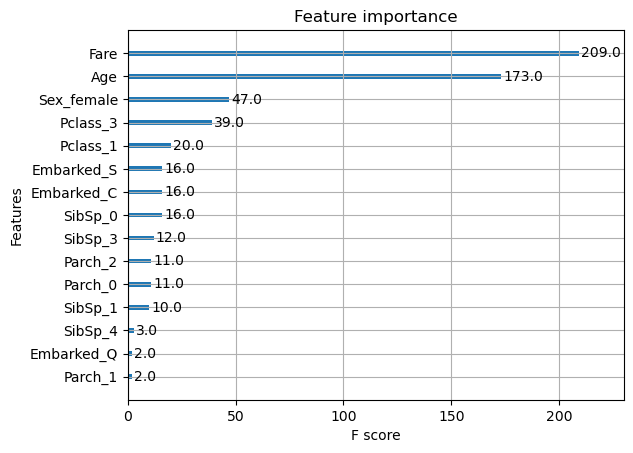

In [64]:
xgb.plot_importance(best_xg)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
 logreg  Classifier : accuracy_log=0.8251121076233184
best_params={'max_iter': 50, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

      Jacked       0.84      0.87      0.86       134
     Rose_GG       0.80      0.75      0.77        89

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.82      0.83      0.82       223



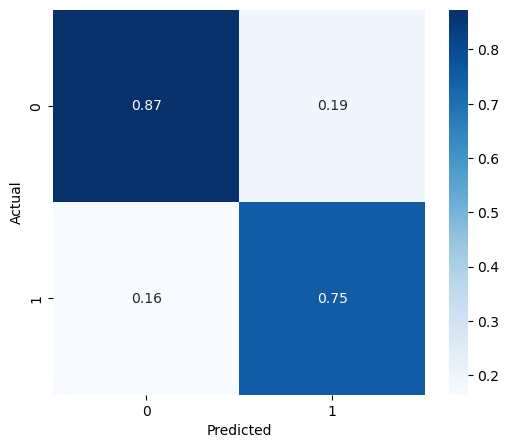

In [65]:
#Avec Logistic regression


#Define model
log = LogisticRegression()

#hyperparameters grid 

param_grid = {
    'max_iter' : [50, 100 , 200 , 500],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

#define gridsearch, won't use refit here so we can study the best model as an object latter
grid = GridSearchCV(log, param_grid, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
grid.fit(x_train, y_train)

#extracting best parameters
best_params = grid.best_params_

#predicting with best estimator
best_log = LogisticRegression(**best_params)
best_log.fit(x_train, y_train)
y_hat_log= best_log.predict(x_test)

#scoring
accuracy_log = accuracy_score(y_test, y_hat_log)
print(f' logreg  Classifier : {accuracy_log=}')

#confusion matrix (normalized)
conf_matrix_log = confusion_matrix(y_test, y_hat_log)
conf_matrix_log = conf_matrix_log/ conf_matrix_log.sum(axis = 1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, cbar = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'{best_params=}')

#classification report 
report = classification_report(y_test, y_hat_log, target_names=['Jacked', 'Rose_GG'])
print(report)
output_log = precision_recall_fscore_support(y_test, y_hat_log, average='macro')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
 svc  Classifier : accuracy_svc=0.7847533632286996
best_params={'kernel': 'poly'}
              precision    recall  f1-score   support

      Jacked       0.77      0.91      0.84       134
     Rose_GG       0.82      0.60      0.69        89

    accuracy                           0.78       223
   macro avg       0.79      0.75      0.76       223
weighted avg       0.79      0.78      0.78       223



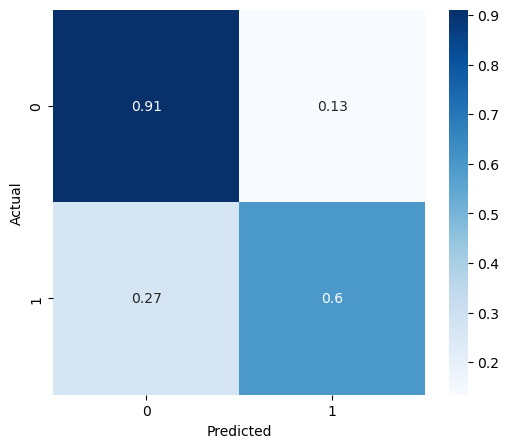

In [66]:
#TEst avec SVM 


#Define model
svc_model = SVC()

#hyperparameters grid 

param_grid = {
    'kernel' : ['linear', 'poly','rbf', 'sigmoid']

}

#define gridsearch, won't use refit here so we can study the best model as an object latter
grid = GridSearchCV(svc_model, param_grid, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
grid.fit(x_train, y_train)

#extracting best parameters
best_params = grid.best_params_

#predicting with best estimator
best_svc = SVC(**best_params)
best_svc.fit(x_train, y_train)
y_hat_svc= best_log.predict(x_test)

#scoring
accuracy_svc = accuracy_score(y_test, y_hat_svc)
print(f' svc  Classifier : {accuracy_svc=}')

#confusion matrix (normalized)
conf_matrix_svc = confusion_matrix(y_test, y_hat_svc)
conf_matrix_svc = conf_matrix_svc/ conf_matrix_svc.sum(axis = 1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svc, annot=True, cbar = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'{best_params=}')

#classification report 
report = classification_report(y_test, y_hat_svc, target_names=['Jacked', 'Rose_GG'])
print(report)
output_svc = precision_recall_fscore_support(y_test, y_hat_svc, average='macro')



Fitting 5 folds for each of 12 candidates, totalling 60 fits
 percept  Classifier : accuracy_percept=0.7892376681614349
best_params={'eta0': 0.5, 'max_iter': 100}
              precision    recall  f1-score   support

      Jacked       0.77      0.93      0.84       134
     Rose_GG       0.84      0.58      0.69        89

    accuracy                           0.79       223
   macro avg       0.80      0.75      0.76       223
weighted avg       0.80      0.79      0.78       223



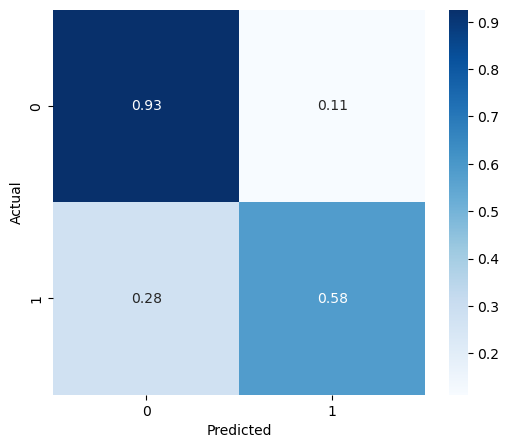

In [67]:
#With Perceptron

#Define model
percept_model = Perceptron()

#hyperparameters grid 

param_grid = {
    'max_iter' : [100, 200, 500, 1000],
    'eta0' : [0.5, 1, 1.5]



}

#define gridsearch, won't use refit here so we can study the best model as an object latter
grid = GridSearchCV(percept_model, param_grid, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
grid.fit(x_train, y_train)

#extracting best parameters
best_params = grid.best_params_

#predicting with best estimator
best_percept = Perceptron(**best_params)
best_percept.fit(x_train, y_train)
y_hat_percept= best_percept.predict(x_test)
#scoring
accuracy_percept = accuracy_score(y_test, y_hat_percept)
print(f' percept  Classifier : {accuracy_percept=}')

#confusion matrix (normalized)
conf_matrix_percept = confusion_matrix(y_test, y_hat_percept)
conf_matrix_percept = conf_matrix_percept/ conf_matrix_percept.sum(axis = 1)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_percept, annot=True, cbar = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'{best_params=}')

#classification report 
report = classification_report(y_test, y_hat_percept, target_names=['Jacked', 'Rose_GG'])
print(report)
output_percept = precision_recall_fscore_support(y_test, y_hat_percept, average='macro')




In [68]:
#Create metrics dataframe in a cumbersome manner

metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Support'])
metrics = metrics.append(pd.DataFrame(index = ['Gradient Boosting','LGBM', 'XGBOOST', 'Log Regression', 'SVC', 'Perceptron']))
metrics['Accuracy']['Gradient Boosting'] = accuracy_gb
metrics['Accuracy']['LGBM'] = accuracy_lgb
metrics['Accuracy']['XGBOOST'] = accuracy_xg
metrics['Accuracy']['Log Regression'] = accuracy_log
metrics['Accuracy']['SVC'] = accuracy_svc
metrics['Accuracy']['Perceptron'] = accuracy_percept
stock_accuracy = metrics['Accuracy']
metrics = metrics.drop(columns= 'Accuracy')
metrics.loc['Gradient Boosting'] = output_GB
metrics.loc['LGBM'] = output_LGBM
metrics.loc['XGBOOST'] = output_xg
metrics.loc['Log Regression'] = output_log
metrics.loc['SVC'] = output_svc
metrics.loc['Perceptron'] = output_percept
metrics = pd.concat([metrics, stock_accuracy], axis = 1)
metrics = metrics.drop(columns='Support')
metrics = metrics.reindex(columns=['Accuracy', 'Precision',	'Recall','F1 Score'])
metrics.style.highlight_max(color='darkgrey')


C:\Users\simplet\AppData\Local\Temp\ipykernel_6060\2838831187.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(pd.DataFrame(index = ['Gradient Boosting','LGBM', 'XGBOOST', 'Log Regression', 'SVC', 'Perceptron']))


,Accuracy,Precision,Recall,F1 Score
Gradient Boosting,0.820628,0.824475,0.797921,0.806121
LGBM,0.807175,0.810384,0.782953,0.791021
XGBOOST,0.825112,0.828315,0.803538,0.811464
Log Regression,0.825112,0.819673,0.812972,0.815855
SVC,0.784753,0.793768,0.752977,0.761964
Perceptron,0.789238,0.804448,0.754821,0.764710
